# Sentiment Analysis

Note: here we'll use SpaCy for POS tagging and related tasks, and look up words in SentiWordNet, which is just a lexicon with sentiment scores. We can get it from the NLTK: 

In [70]:
from nltk.corpus import sentiwordnet as sw
import nltk
import requests
import spacy
import pandas as pd
%matplotlib inline

In [29]:
nlp = spacy.load('en_core_web_lg')

In [9]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /home/jon/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [14]:
awful = list(sw.senti_synsets('terrible', 'a'))[0]

In [17]:
awful.neg_score()

0.625

In [18]:
awful.pos_score()

0.0

In [19]:
awful.obj_score()

0.375

In [33]:
bear = list(sw.senti_synsets('bear', 'n'))[0]
bear.neg_score(), bear.pos_score()

(0.0, 0.0)

In [22]:
dublinersUrl = 'https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis/gh-pages/_texts/dubliners.md'
dublinersRaw = requests.get(dublinersUrl).text

In [23]:
dublinersStories = dublinersRaw.split('\n## ')

In [26]:
clay = dublinersStories[10]

In [34]:
clayDoc = nlp(clay)

In [52]:
lemmaList = []
for sent in clayDoc.sents: 
    sentLemmaList = []
    for w in sent: 
        if (not w.is_stop) and (not w.is_punct) and (not w.is_space) and (w.pos_ is not 'PROPN'): 
            sentLemmaList.append((w.lemma_, w.pos_))
    lemmaList.append(sentLemmaList)

In [66]:
sentScores = []
for sent in lemmaList: 
    scores = []
    for word, pos in sent: 
        synPos = pos.lower()[0]
        if synPos not in ['a', 'n', 'v']:
            continue
        synsets = list(sw.senti_synsets(word, synPos))
        #print(synsets)
        if (type(synsets) == list) and len(synsets)>0:
            #print('yay!')
            synset = synsets[0]
            score = synset.pos_score() - synset.neg_score()
            scores.append(score)
    if len(scores)>0: 
        avgScores = sum(scores) / len(scores)
        sentScores.append(avgScores)

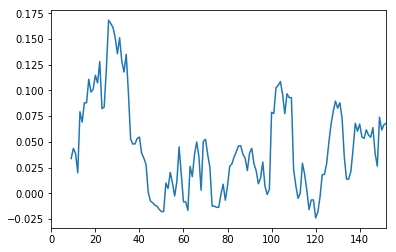

In [76]:
pd.Series(sentScores).rolling(10).mean().plot()

In [74]:
max(sentScores)

0.875

In [73]:
for pair in zip(clayDoc.sents, sentScores):
    print(pair)

(CLAY

, -0.015625)
(THE matron had given her leave to go out as soon as the women's tea was
over and Maria looked forward to her evening out., 0.125)
(The kitchen was spick
and span: the cook said you could see yourself in the big copper
boilers., 0.1875)
(The fire was nice and bright and on one of the side-tables were
four very big barmbracks., 0.03125)
(These barmbracks seemed uncut; but if you went
closer you would see that they had been cut into long thick even slices
and were ready to be handed round at tea., 0.125)
(Maria had cut them herself.

, -0.1875)
(Maria was a very, very small person indeed, 0.0)
(but she had a very long nose
and a very long chin., -0.125)
(She talked a little through her nose, always
soothingly:, 0.125)
("Yes, my dear," and "No, my dear., 0.07142857142857142)
(", 0.08333333333333333)
(She was always sent for
when the women quarrelled over their tubs and always succeeded in making
peace., 0.075)
(One day the matron had said to her:

"Maria, you are a ver